In [20]:
VERSION

v"1.8.1"

In [21]:
ENV["COLUMNS"] = 1000
ENV["LINES"] = 20;

In [22]:
# using Pkg
# module_name = "ScatteredInterpolation"
# Pkg.add(module_name)
# Pkg.update(module_name)
# Pkg.build(module_name)

In [23]:
using GLMakie
using JLD2

using Revise
using Astroshaper
import SPICE

In [24]:
meta_kernel = "/Users/masanorikanamaru/Dropbox/spice/hera/kernels/mk/hera_study_PO_EMA_2024_shapeViewer.tm"

SPICE.furnsh(meta_kernel)

In [25]:
et_start = SPICE.utc2et("2027-02-09T22:00:00")
et_end   = SPICE.utc2et("2027-02-18T22:00:00")
step     = 3600/72

et_range = et_start:step:et_end

@show et_range
@show length(et_range);

et_range = 8.554824691849957e8:50.0:8.562600691849957e8
length(et_range) = 15553


In [26]:
# save_range = findall(et_range .> et_range[end] - 7.63262 * 3600)
save_range = 1:length(et_range)

@show save_range[begin]
@show save_range[end]
@show length(save_range);

save_range[begin] = 1
save_range[end] = 15553
length(save_range) = 15553


In [27]:
sun_d1 = spkpos("SUN",       et_range, "DIDYMOS_FIXED",   "None", "DIDYMOS")
sun_d2 = spkpos("SUN",       et_range, "DIMORPHOS_FIXED", "None", "DIMORPHOS")
d1_d2  = spkpos("DIDYMOS",   et_range, "DIMORPHOS_FIXED", "None", "DIMORPHOS")
d2_d1  = spkpos("DIMORPHOS", et_range, "DIDYMOS_FIXED",   "None", "DIDYMOS");

In [28]:
D1_TO_D2 = pxform("DIDYMOS_FIXED",   "DIMORPHOS_FIXED", et_range)
D2_TO_D1 = pxform("DIMORPHOS_FIXED", "DIDYMOS_FIXED",   et_range)

D1_TO_J2000 = pxform("DIDYMOS_FIXED",   "J2000", et_range)
D2_TO_J2000 = pxform("DIMORPHOS_FIXED", "J2000", et_range);

In [29]:
SPICE.kclear()

In [30]:
# fig = Figure()
# ax = Axis3(fig[1, 1], aspect=:data)

# scatter!([r[1] for r in sun_d1], [r[2] for r in sun_d1], [r[3] for r in sun_d1], color=:orange, size=2)

# display(fig)

# Shape Models: Didymos & Dimorphos

In [31]:
shapedir = "/Users/masanorikanamaru/Dropbox/spice/hera/kernels/dsk"

shapepath1 = joinpath(shapedir, "g_50677mm_rad_obj_dida_0000n00000_v001.obj")
shapepath2 = joinpath(shapedir, "g_06650mm_rad_obj_didb_0000n00000_v001.obj")

shape1 = ShapeModel(shapepath1; scale=1000, find_visible_facets=true, save_shape=false)
shape2 = ShapeModel(shapepath2; scale=1000, find_visible_facets=true, save_shape=false)
shapes = (shape1, shape2);

In [32]:
println(shapes[1])
println(shapes[2])

Shape model
-----------
Nodes             : 1000
Faces             : 1996
Surface area      : 1.9587914739775863e6
Volume            : 2.485481753075182e8
Equivalent radius : 390.03836143582186
Maximum radius    : 427.5183409578403
Minimum radius    : 352.28283811149896
Center-of-Figure  : [2.484674354494825e-6, -2.0997384259416257e-6, 2.190089591373722e-6]
Inertia tensor    : 
    | Ixx Ixy Ixz |   [0.0, 0.0, 0.0]
    | Iyx Iyy Iyz | = [0.0, 0.0, 0.0]
    | Izx Izy Izz |   [0.0, 0.0, 0.0]

Shape model
-----------
Nodes             : 1538
Faces             : 3072
Surface area      : 53920.63065752515
Volume            : 1.1314114665400542e6
Equivalent radius : 64.64138537338498
Maximum radius    : 82.0000022649765
Minimum radius    : 52.499998360872304
Center-of-Figure  : [2.009646200056278e-16, 3.5852088209004e-16, -2.9131831316015805e-15]
Inertia tensor    : 
    | Ixx Ixy Ixz |   [0.0, 0.0, 0.0]
    | Iyx Iyy Iyz | = [0.0, 0.0, 0.0]
    | Izx Izy Izz |   [0.0, 0.0, 0.0]



# TPM only on Didymos

In [14]:
thermo_params = ThermoParams(  # [Michel+2016; Naidu+2020]
    A_B   = 0.059,  # Bolometric  Bond albedo
    A_TH  = 0.0,
    k     = 0.125,
    ρ     = 2170.,
    Cp    = 600.,
    ϵ     = 0.9,
    t_bgn = et_range[begin],
    t_end = et_range[end],
    Nt    = length(et_range),
    z_max = 0.6,
    Nz    = 41,
    P     = SPICE.convrt(DIDYMOS[:P], "hours", "seconds"),
)

Thermophysical parameters
-------------------------
A_B   : 0.059
A_TH  : 0.0
k     : 0.125
ρ     : 2170.0
Cp    : 600.0
ϵ     : 0.9
-------------------------
t_bgn : 8.554824691849957e8
t_bgn : 105180.37410616312 (Normalized by period P)
t_end : 8.555688691849957e8
t_end : 105190.99686542484 (Normalized by period P)
Nt    : 241
Δt    : 360.0000000001112
Δt    : 0.044261496923839634 (Normalized by period P)
-------------------------
z_max : 0.6
z_max : 6.057014348123621 (Normalized by skin depth l)
Nz    : 41
Δz    : 0.015
Δz    : 0.15142535870309054 (Normalized by skin depth l)
-------------------------
P     : 8133.4800000000005
l     : 0.09905870541414048
Γ     : 403.4228550788862
λ     : 0.15360983102923334
-------------------------


In [1]:
savepath = "tmp.jld2"
run_TPM!(shape1, et_range, sun_d1, thermo_params, savepath, save_range)

jldopen(savepath, "r+") do file
    file["D1_TO_J2000"] = D1_TO_J2000[save_range]
end;

In [16]:
# draw(shape1; data=:temperature, colormap=:vik)

In [17]:
data = load("tmp.jld2");

In [18]:
# data["shape"]
# data["et_range"]
# data["sun"]
# data["thermo_params"]
# data["surf_temps"]
# data["forces"]
# data["torques"]

# data["D1_TO_J2000"]

# TPM only on Dimorphos

In [ ]:
thermo_params = ThermoParams(  # [Michel+2016; Naidu+2020]
    A_B   = 0.059,  # Bolometric  Bond albedo
    A_TH  = 0.0,
    k     = 0.125,
    ρ     = 2170.,
    Cp    = 600.,
    ϵ     = 0.9,
    t_bgn = et_range[begin],
    t_end = et_range[end],
    Nt    = length(et_range),
    z_max = 0.6,
    Nz    = 41,
    P     = SPICE.convrt(DIDYMOS[:P], "hours", "seconds"),
);

In [ ]:
savepath = "tmp.jld2"
run_TPM!(shape2, et_range, sun_d2, thermo_params, savepath, save_range)

jldopen(savepath, "r+") do file
    file["D2_TO_J2000"] = D2_TO_J2000[save_range]
end;

In [ ]:
draw(shape2; data=:temperature, colormap=:vik)

# TPM on Binary Asteroid

In [33]:
thermo_params = ThermoParams(  # [Michel+2016; Naidu+2020]
    A_B   = 0.059,  # Bolometric  Bond albedo
    A_TH  = 0.0,
    k     = 0.125,
    ρ     = 2170.,
    Cp    = 600.,
    ϵ     = 0.9,
    t_bgn = et_range[begin],
    t_end = et_range[end],
    Nt    = length(et_range),
    z_max = 0.6,
    Nz    = 41,
    P     = SPICE.convrt(DIDYMOS[:P], "hours", "seconds"),
);

In [34]:
savepath = "tmp.jld2"
run_TPM!(shapes, et_range, (sun_d1, sun_d2), D2_TO_D1, d2_d1, thermo_params, savepath, save_range)

# jldopen(savepath, "r+") do file
#     file["D2_TO_J2000"] = D2_TO_J2000[save_range]
# end;

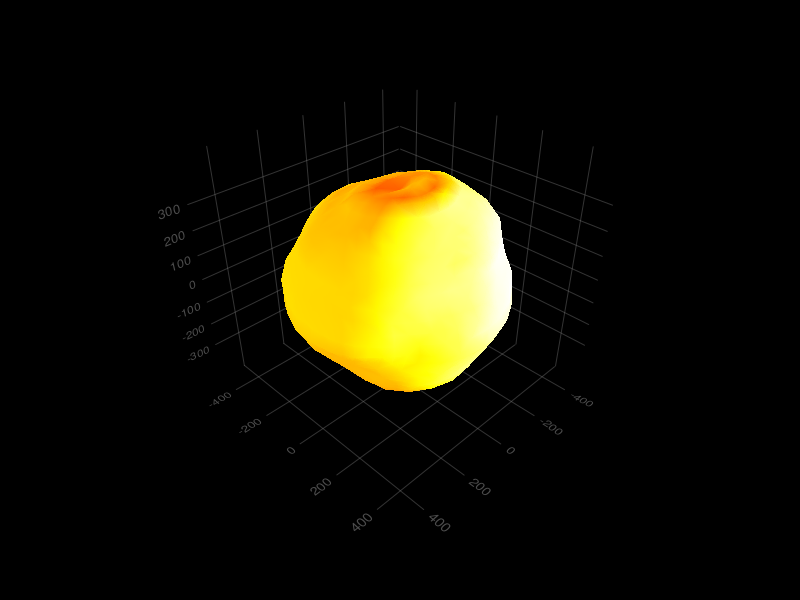

In [235]:
draw(shape1; data=:temperature, colormap=:hot, strokewidth=0)
# draw(shape2; data=:temperature, colormap=:vik)
# draw(shapes, d2_d1[end], D2_TO_D1[end]; colormap=:hot)

In [37]:
data = load("tmp.jld2")
keys(data)

KeySet for a Dict{String, Any} with 8 entries. Keys:
  "et_range"
  "suns"
  "S2P"
  "thermo_params"
  "forces"
  "shapes"
  "surf_temps"
  "torques"

In [42]:
# data["shapes"]
# data["et_range"]
# data["suns"][1]
# data["thermo_params"]
# data["surf_temps"][1]
# data["forces"]
# data["torques"]

# data["D1_TO_J2000"]

# Temperature Map

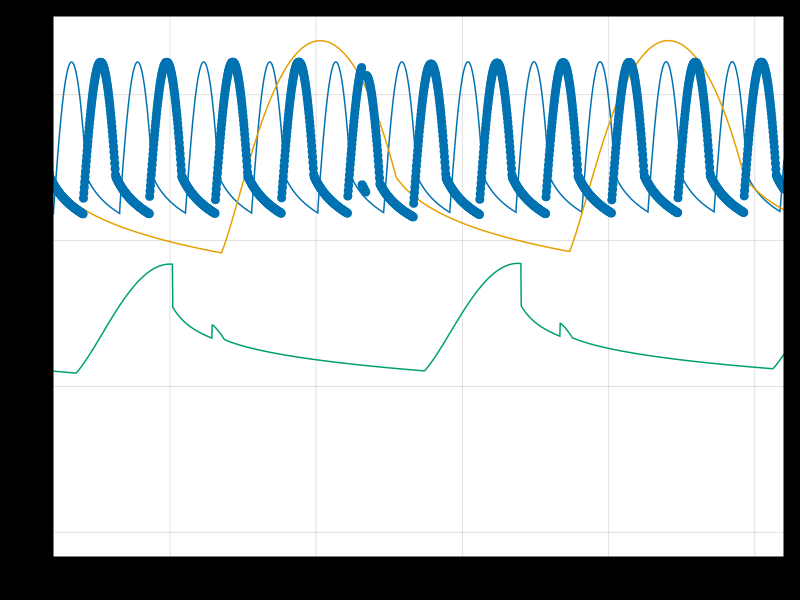

In [210]:
fig = Figure()
ax = Axis(fig[1, 1])

ts = @. (data["et_range"] - data["et_range"][begin]) / 3600

lines!(ts, data["surf_temps"][1][302, :])  # At equator
lines!(ts, data["surf_temps"][2][528, :])  # At equator

scatter!(ts, data["surf_temps"][1][600, :])
# lines!(ts, data["surf_temps"][2][1000, :])
lines!(ts, data["surf_temps"][2][3000, :])

xlims!(191, 216)
# xlims!(201, 203)
# ylims!(150, 350)

display(fig)

In [3]:
# temps1 = data["surf_temps"][1][:, 114]
# temperature_map(shape1, temps1; nlevels=10, title="Didymos", filepath="tmp/temp_map_Didymos.pdf")

In [2]:
# temps2 = data["surf_temps"][2][:, 114]
# temperature_map(shape2, temps2; nlevels=10, title="Dimorphos", filepath="tmp/temp_map_Dimorphos.pdf")

Max. temperature: 337.2467841929806
Min. temperature: 0.0


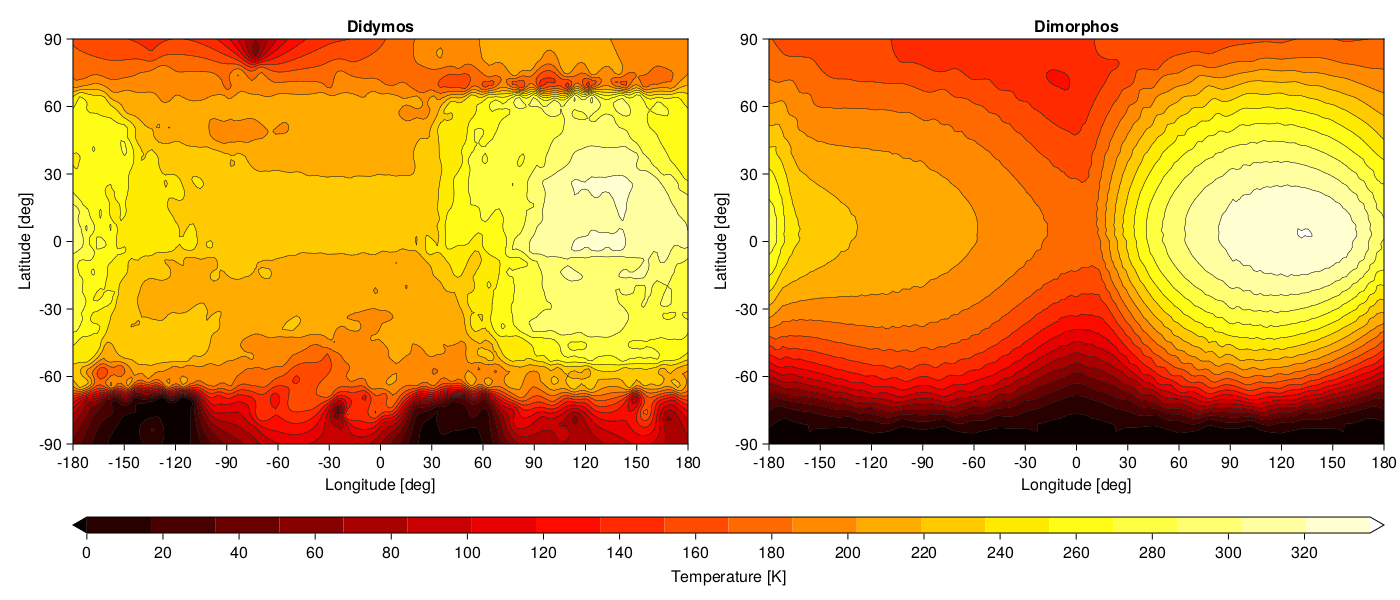

In [96]:
temps1 = data["surf_temps"][1][:, end]
temps2 = data["surf_temps"][2][:, end]
temperature_map(data["shapes"]..., temps1, temps2; nlevels=20, titles=("Didymos", "Dimorphos"), filepath="tmp/temp_maps.pdf")

In [40]:
# draw(shape1; data=temps1, colormap=:hot, strokewidth=0)
# draw(shape2; data=temps2, colormap=:hot, strokewidth=0)

In [42]:
meta_kernel = "/Users/masanorikanamaru/Dropbox/spice/hera/kernels/mk/hera_study_PO_EMA_2024_shapeViewer.tm"

SPICE.furnsh(meta_kernel)

In [44]:
# for (i, et) in enumerate(data["et_range"])
#     temps1 = data["surf_temps"][1][:, i]
#     temps2 = data["surf_temps"][2][:, i]
#     filepath = "./tmp/temp_maps/temp_maps_" * string(et) * ".png"
#     titles = (
#         "Didimos: "   * SPICE.et2utc(et, "C", 0),
#         "Dimorphos: " * SPICE.et2utc(et, "C", 0),
#     )
#     temperature_map(shape1, shape2, temps1, temps2; colorrange=(0,350), nlevels=10, filepath, titles)
# end

In [179]:
SPICE.kclear()

# Analysis of Temperature Change

- どれくらいの撮像間隔なら熱物性値を決められるか？

In [53]:
filepath = "/Users/masanorikanamaru/Dropbox/Hera/TPM/temp_maps_2027-02-09T22-00-00_2027-02-18T22-00-00/temp_maps.jld2"
data = load(filepath)
keys(data)

KeySet for a Dict{String, Any} with 8 entries. Keys:
  "et_range"
  "suns"
  "S2P"
  "thermo_params"
  "forces"
  "shapes"
  "surf_temps"
  "torques"

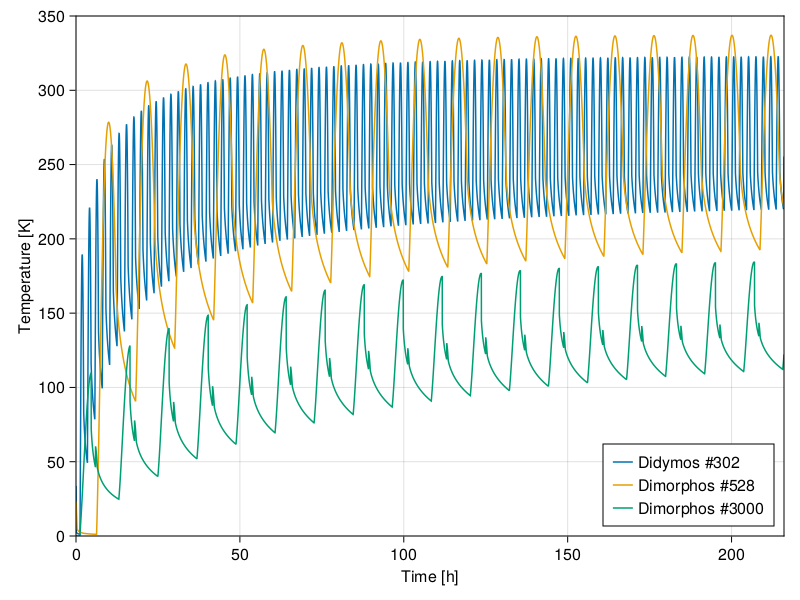

In [71]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="Time [h]", ylabel="Temperature [K]")

ts = @. (data["et_range"] - data["et_range"][begin]) / 3600

lines!(ts, data["surf_temps"][1][302, :], label="Didymos #302")      # At equator
lines!(ts, data["surf_temps"][2][528, :], label="Dimorphos #528")    # At equator
lines!(ts, data["surf_temps"][2][3000, :], label="Dimorphos #3000")  # At equator (Eclipse can be observed)

xlims!(0, 216)
ylims!(0, 350)

axislegend(ax, position=:rb)
save("tmp.pdf", fig)
display(fig)

In [55]:
selected = @. data["et_range"] > data["et_range"][end] - 3600*24;

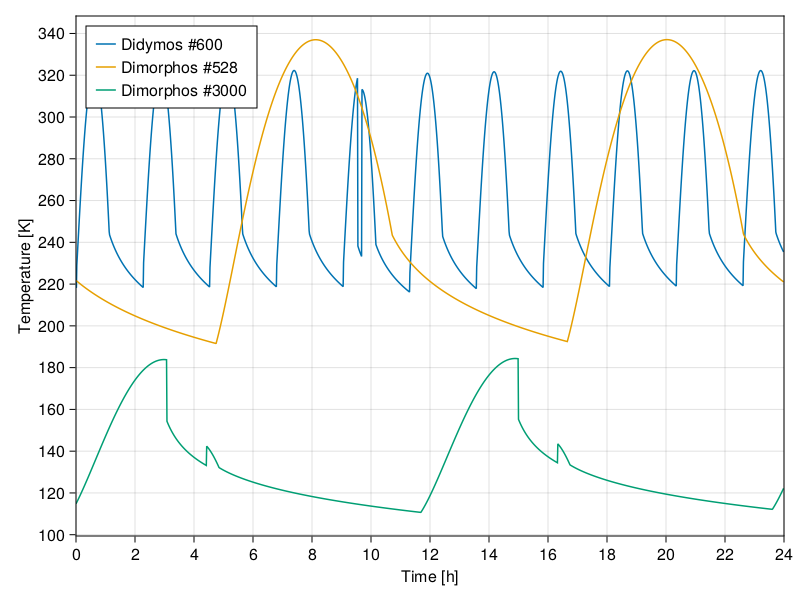

In [87]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="Time [h]", ylabel="Temperature [K]", xticks=0:2:24, yticks=0:20:500)

ts = @. (data["et_range"][selected] - data["et_range"][selected][begin]) / 3600

# lines!(ts, data["surf_temps"][1][302,  selected], label="Didymos #302")     # At equator
lines!(ts, data["surf_temps"][1][600,  selected], label="Didymos #600")     # At equator (Eclipse can be observed)
lines!(ts, data["surf_temps"][2][528,  selected], label="Dimorphos #528")   # At equator
lines!(ts, data["surf_temps"][2][3000, selected], label="Dimorphos #3000")  # At equator (Eclipse can be observed)

xlims!(0, 24)
# xlims!(9.5, 9.8)
# xlims!(14, 18)
# ylims!(0, 350)

axislegend(ax, position=:lt)
save("tmp.pdf", fig)
display(fig)